# **Data Science for Health**

## Project Activity - E2 - Exploratory Data Analysis

---

Group Members and RA:

Alessandro Welbi Domingues Junior   263535

Felipe Augusto Oliveira dos Santos  233292

Felipe Marinho Tavares              265680

Thiago Machado da Cunha             231357

---

About the *dataset*:

>The dataset consists in Simon conflict task with cost of conflict reinforcement manipulation where 28 Parkinson patients and 28 matched controls were studied. PD came in twice separated by a week, either ON or OFF medication. CTL only came in once.  The data was collected in 2015 at Cognitive Rhythms and Computation Lab at University of New Mexico.  Patients also had an acceleromter taped to their most tremor affected hand.  X, Y, Z dimensions recorded throughout.


*About EEG Channels*:

>An electrode capturing brainwave activity is called an EEG channel. Typical EEG systems can have as few as a single channel to as many as 256 channels. Electrode placement on the head adheres to a formal standard called the 10/20 system or International 10/20 system. This system uses the distance from the bridge of the nose (the nasion) to the lowest point of the skull from the back of the head (normally indicated by a prominent bump—the inion) as a reference distance for a given person’s head size. The electrodes are then separated from each other either by 10% or 20% of this reference distance 

Out of the total 84 recordings from the dataset, 56 have metadata with information about sex and age.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Importing dataset metadata

In [2]:
commom_path = "https://raw.githubusercontent.com/OptionalLanguor/datasci4health/master/data/external/eeglab_dataset/"
participants_file = "participants.tsv"

url_participants = commom_path + participants_file
participants = pd.read_csv(url_participants, sep="\t")

participants.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
0,sub-001,8010,CTL,NaN,no s2,Female,61
1,sub-002,801,PD,ON,OFF,Female,60
2,sub-003,802,PD,OFF,ON,Male,75
3,sub-004,803,PD,OFF,ON,Female,76
4,sub-005,804,PD,ON,OFF,Male,75


## Replacing sex values
Female: 0
Male: 1


In [3]:
participants['sex'] = participants['sex'].replace(['Female'], 0)
participants['sex'] = participants['sex'].replace(['Male'], 1)

participants.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
0,sub-001,8010,CTL,NaN,no s2,0,61
1,sub-002,801,PD,ON,OFF,0,60
2,sub-003,802,PD,OFF,ON,1,75
3,sub-004,803,PD,OFF,ON,0,76
4,sub-005,804,PD,ON,OFF,1,75


## Replacing group values
CTL: 0
PD: 1

In [4]:
participants['Group'] = participants['Group'].replace(['CTL'], 0)
participants['Group'] = participants['Group'].replace(['PD'], 1)

participants.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
0,sub-001,8010,0,NaN,no s2,0,61
1,sub-002,801,1,ON,OFF,0,60
2,sub-003,802,1,OFF,ON,1,75
3,sub-004,803,1,OFF,ON,0,76
4,sub-005,804,1,ON,OFF,1,75


## Statistics

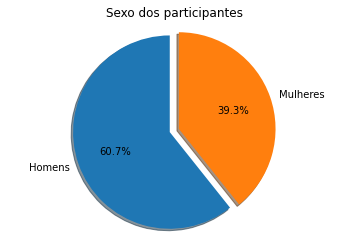

In [5]:
females = participants[participants['sex'] == 0]
males = participants[participants['sex'] == 1]

total_participants = 56

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Homens', 'Mulheres'
sizes = [len(males), len(females)]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Sexo dos participantes')
plt.show()

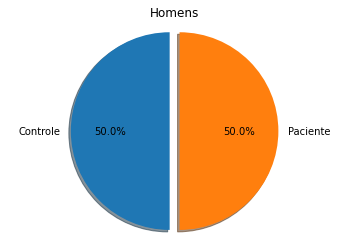

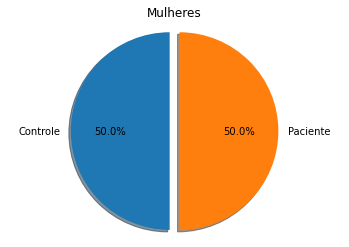

In [6]:
females_control_group = females[females['Group'] == 0]
females_pacient_group = females[females['Group'] == 1]

males_control_group = males[males['Group'] == 0]
males_pacient_group = males[males['Group'] == 1]

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Controle', 'Paciente'
sizes = [len(males_control_group), len(males_pacient_group)]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Homens')
plt.show()

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Controle', 'Paciente'
sizes = [len(females_control_group), len(females_pacient_group)]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Mulheres')
plt.show()

## Distribution of sex and age between Male and Female

In [7]:
print("Total age distribution")
display(participants[['age']].describe().T)

print("Female age distribution:")
display(participants[participants['sex'] == 0][['age']].describe().T)

print("Male age distribution:")
display(participants[participants['sex'] == 1][['age']].describe().T)

Total age distribution


,count,mean,std,min,25%,50%,75%,max
age,56.0,69.482143,8.839973,48.0,64.0,70.0,75.25,84.0


Female age distribution:


,count,mean,std,min,25%,50%,75%,max
age,22.0,66.5,9.71376,48.0,61.75,66.5,73.75,83.0


Male age distribution:


,count,mean,std,min,25%,50%,75%,max
age,34.0,71.411765,7.773762,52.0,68.0,71.5,75.75,84.0


Boxplot for the three age distributions


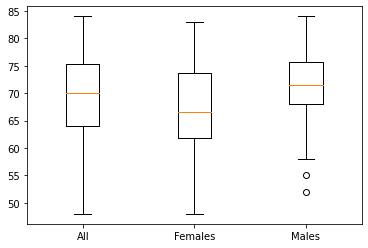

In [8]:
print("Boxplot for the three age distributions")
plt.boxplot([participants['age'].values, females['age'].values, males['age'].values],
            labels=['All', 'Females', 'Males'])
plt.show()

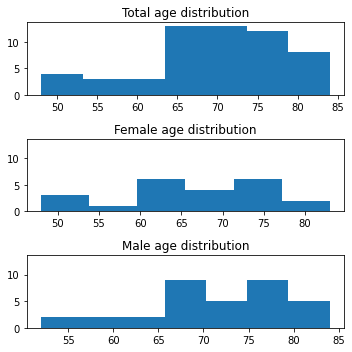

In [9]:
fig, axs = plt.subplots(3, sharey=True, tight_layout=True, figsize=(5,5))
axs[0].hist(participants[['age']], bins='auto')
axs[0].set_title('Total age distribution')
axs[1].hist(females['age'], bins='auto')
axs[1].set_title('Female age distribution')
axs[2].hist(males['age'], bins='auto')
axs[2].set_title('Male age distribution')
plt.show()

# Participant #1
Number of sections: 1

In [10]:
# Participant data
p01 = participants[participants['participant_id'] == 'sub-001']
p01.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
0,sub-001,8010,0,NaN,no s2,0,61


##channels

In [11]:
url_channels_p01_s01 = commom_path + "sub-001/ses-01/eeg/sub-001_ses-01_task-SimonConflict_channels.tsv"
channels_p01_s01 = pd.read_csv(url_channels_p01_s01, sep="\t")


channels_p01_s01.head()

,name,type,units
0,Fp1,NaN,NaN
1,Fz,NaN,NaN
2,F3,NaN,NaN
3,F7,NaN,NaN
4,FT9,NaN,NaN


##eletrodos



In [12]:
url_eletrodes_p01_s01 = commom_path + "sub-001/ses-01/eeg/sub-001_ses-01_task-SimonConflict_electrodes.tsv"
eletrodes_p01_s01 = pd.read_csv(url_eletrodes_p01_s01, sep="\t")

eletrodes_p01_s01

,name,x,y,z
0,Fp1,80.78,26.13,-4.00
1,Fz,60.74,-0.00,59.46
2,F3,57.55,48.20,39.87
3,F7,49.87,68.42,-7.49
4,FT9,23.30,70.08,-42.09
...,...,...,...,...
62,AF8,68.72,-49.67,-5.95
63,VEOG,62.04,-31.61,-48.75
64,X,NaN,NaN,NaN
65,Y,NaN,NaN,NaN


##eventos

In [13]:
url_events_p01_s01 = commom_path + "sub-001/ses-01/eeg/sub-001_ses-01_task-SimonConflict_events.tsv"
events_p01_s01 = pd.read_csv(url_events_p01_s01, sep="\t")

events_p01_s01.head()

,onset,duration,sample,trial_type,response_time,stim_file,value
0,0.000,NaN,NaN,STATUS,NaN,NaN,boundary
1,696.988,NaN,NaN,Trn Stim: yellow congru D,NaN,NaN,S114
2,697.790,NaN,NaN,Trn No Response,NaN,NaN,S105
3,699.890,NaN,NaN,Trn Stim: yellow congru C,NaN,NaN,S113
4,700.692,NaN,NaN,Trn No Response,NaN,NaN,S105


# Participant #2
Number of sections: 2

In [14]:
# Participant data
p02 = participants[participants['participant_id'] == 'sub-002']
p02.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
1,sub-002,801,1,ON,OFF,0,60


In [15]:
# Section 1
url_channels_p02_s01 = commom_path + "sub-002/ses-01/eeg/sub-002_ses-01_task-SimonConflict_channels.tsv"
url_eletrodes_p02_s01 = commom_path + "sub-002/ses-01/eeg/sub-002_ses-01_task-SimonConflict_electrodes.tsv"
url_events_p02_s01 = commom_path + "sub-002/ses-01/eeg/sub-002_ses-01_task-SimonConflict_events.tsv"

channels_p2_s01 = pd.read_csv(url_channels_p02_s01, sep="\t")
eletrodes_p2_s01 = pd.read_csv(url_eletrodes_p02_s01, sep="\t")
events_p2_s01 = pd.read_csv(url_events_p02_s01, sep="\t")

In [16]:
# Section 2
url_channels_p02_s02 = commom_path + "sub-002/ses-02/eeg/sub-002_ses-02_task-SimonConflict_channels.tsv"
url_eletrodes_p02_s02 = commom_path + "sub-002/ses-02/eeg/sub-002_ses-02_task-SimonConflict_electrodes.tsv"
url_events_p02_s02 = commom_path + "sub-002/ses-02/eeg/sub-002_ses-02_task-SimonConflict_events.tsv"

channels_p02_s02 = pd.read_csv(url_channels_p02_s02, sep="\t")
eletrodes_p02_s02 = pd.read_csv(url_eletrodes_p02_s02, sep="\t")
events_p02_s02 = pd.read_csv(url_events_p02_s02, sep="\t")


# Participant #3
Number of sections: 2

In [17]:
# Participant data
p03 = participants[participants['participant_id'] == 'sub-003']
p03.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
2,sub-003,802,1,OFF,ON,1,75


In [18]:
# Section 1
url_channels_p03_s01 = commom_path + "sub-003/ses-01/eeg/sub-003_ses-01_task-SimonConflict_channels.tsv"
url_eletrodes_p03_s01 = commom_path + "sub-003/ses-01/eeg/sub-003_ses-01_task-SimonConflict_electrodes.tsv"
url_events_p03_s01 = commom_path + "sub-003/ses-01/eeg/sub-003_ses-01_task-SimonConflict_events.tsv"

channels_p03_s01 = pd.read_csv(url_channels_p03_s01, sep="\t")
eletrodes_p03_s01 = pd.read_csv(url_eletrodes_p03_s01, sep="\t")
events_p03_s01 = pd.read_csv(url_events_p03_s01, sep="\t")

In [19]:
# Section 2
url_channels_p03_s02 = commom_path + "sub-003/ses-02/eeg/sub-003_ses-02_task-SimonConflict_channels.tsv"
url_eletrodes_p03_s02 = commom_path + "sub-003/ses-02/eeg/sub-003_ses-02_task-SimonConflict_electrodes.tsv"
url_events_p03_s02 = commom_path + "sub-003/ses-02/eeg/sub-003_ses-02_task-SimonConflict_events.tsv"

channels_p03_s02 = pd.read_csv(url_channels_p03_s02, sep="\t")
eletrodes_p03_s02 = pd.read_csv(url_eletrodes_p03_s02, sep="\t")
events_p03_s02 = pd.read_csv(url_events_p03_s02, sep="\t")


# Participant #4
Number of sections: 2

In [20]:
# Participant data
p04 = participants[participants['participant_id'] == 'sub-004']
p04.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
3,sub-004,803,1,OFF,ON,0,76


In [21]:
# Section 1
url_channels_p04_s01 = commom_path + "sub-004/ses-01/eeg/sub-004_ses-01_task-SimonConflict_channels.tsv"
url_eletrodes_p04_s01 = commom_path + "sub-004/ses-01/eeg/sub-004_ses-01_task-SimonConflict_electrodes.tsv"
url_events_p04_s01 = commom_path + "sub-004/ses-01/eeg/sub-004_ses-01_task-SimonConflict_events.tsv"

channels_p04_s01 = pd.read_csv(url_channels_p04_s01, sep="\t")
eletrodes_p04_s01 = pd.read_csv(url_eletrodes_p04_s01, sep="\t")
events_p04_s01 = pd.read_csv(url_events_p04_s01, sep="\t")

In [22]:
# Section 2
url_channels_p04_s02 = commom_path + "sub-004/ses-02/eeg/sub-004_ses-02_task-SimonConflict_channels.tsv"
url_eletrodes_p04_s02 = commom_path + "sub-004/ses-02/eeg/sub-004_ses-02_task-SimonConflict_electrodes.tsv"
url_events_p04_s02 = commom_path + "sub-004/ses-02/eeg/sub-004_ses-02_task-SimonConflict_events.tsv"

channels_p04_s02 = pd.read_csv(url_channels_p04_s02, sep="\t")
eletrodes_p04_s02 = pd.read_csv(url_eletrodes_p04_s02, sep="\t")
events_p04_s02 = pd.read_csv(url_events_p04_s02, sep="\t")


# Participant #5
Number of sections: 2

In [23]:
# Participant data
p05 = participants[participants['participant_id'] == 'sub-005']
p05.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
4,sub-005,804,1,ON,OFF,1,75


In [24]:
# Section 1
url_channels_p05_s01 = commom_path + "sub-005/ses-01/eeg/sub-005_ses-01_task-SimonConflict_channels.tsv"
url_eletrodes_p05_s01 = commom_path + "sub-005/ses-01/eeg/sub-005_ses-01_task-SimonConflict_electrodes.tsv"
url_events_p05_s01 = commom_path + "sub-005/ses-01/eeg/sub-005_ses-01_task-SimonConflict_events.tsv"

channels_p05_s01 = pd.read_csv(url_channels_p05_s01, sep="\t")
eletrodes_p05_s01 = pd.read_csv(url_eletrodes_p05_s01, sep="\t")
events_p05_s01 = pd.read_csv(url_events_p05_s01, sep="\t")

In [25]:
# Section 2
url_channels_p05_s02 = commom_path + "sub-005/ses-02/eeg/sub-005_ses-02_task-SimonConflict_channels.tsv"
url_eletrodes_p05_s02 = commom_path + "sub-005/ses-02/eeg/sub-005_ses-02_task-SimonConflict_electrodes.tsv"
url_events_p05_s02 = commom_path + "sub-005/ses-02/eeg/sub-005_ses-02_task-SimonConflict_events.tsv"

channels_p05_s02 = pd.read_csv(url_channels_p05_s02, sep="\t")
eletrodes_p05_s02 = pd.read_csv(url_eletrodes_p05_s02, sep="\t")
events_p05_s02 = pd.read_csv(url_events_p05_s02, sep="\t")


# Participant #6
Number of sections: 2

In [26]:
# Participant data
p06 = participants[participants['participant_id'] == 'sub-006']
p06.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
5,sub-006,805,1,ON,OFF,1,79


In [27]:
# Section 1
url_channels_p06_s01 = commom_path + "sub-006/ses-01/eeg/sub-006_ses-01_task-SimonConflict_channels.tsv"
url_eletrodes_p06_s01 = commom_path + "sub-006/ses-01/eeg/sub-006_ses-01_task-SimonConflict_electrodes.tsv"
url_events_p06_s01 = commom_path + "sub-006/ses-01/eeg/sub-006_ses-01_task-SimonConflict_events.tsv"

channels_p06_s01 = pd.read_csv(url_channels_p06_s01, sep="\t")
eletrodes_p06_s01 = pd.read_csv(url_eletrodes_p06_s01, sep="\t")
events_p06_s01 = pd.read_csv(url_events_p06_s01, sep="\t")

In [28]:
# Section 2
url_channels_p06_s02 = commom_path + "sub-006/ses-02/eeg/sub-006_ses-02_task-SimonConflict_channels.tsv"
url_eletrodes_p06_s02 = commom_path + "sub-006/ses-02/eeg/sub-006_ses-02_task-SimonConflict_electrodes.tsv"
url_events_p06_s02 = commom_path + "sub-006/ses-02/eeg/sub-006_ses-02_task-SimonConflict_events.tsv"

channels_p06_s02 = pd.read_csv(url_channels_p06_s02, sep="\t")
eletrodes_p06_s02 = pd.read_csv(url_eletrodes_p06_s02, sep="\t")
events_p06_s02 = pd.read_csv(url_events_p06_s02, sep="\t")


# Participant #7
Number of sections: 1

In [29]:
# Participant data
p07 = participants[participants['participant_id'] == 'sub-007']
p07.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
6,sub-007,8060,0,NaN,no s2,0,83


In [30]:
# Section 1
url_channels_p07_s01 = commom_path + "sub-007/ses-01/eeg/sub-007_ses-01_task-SimonConflict_channels.tsv"
url_eletrodes_p07_s01 = commom_path + "sub-007/ses-01/eeg/sub-007_ses-01_task-SimonConflict_electrodes.tsv"
url_events_p07_s01 = commom_path + "sub-007/ses-01/eeg/sub-007_ses-01_task-SimonConflict_events.tsv"

channels_p07_s01 = pd.read_csv(url_channels_p07_s01, sep="\t")
eletrodes_p07_s01 = pd.read_csv(url_eletrodes_p07_s01, sep="\t")
events_p07_s01 = pd.read_csv(url_events_p07_s01, sep="\t")

# Participant #8
Number of sections: 2

In [31]:
# Participant data
p08 = participants[participants['participant_id'] == 'sub-008']
p08.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
7,sub-008,806,1,OFF,ON,0,79


In [32]:
# Section 1
url_channels_p08_s01 = commom_path + "sub-008/ses-01/eeg/sub-008_ses-01_task-SimonConflict_channels.tsv"
url_eletrodes_p08_s01 = commom_path + "sub-008/ses-01/eeg/sub-008_ses-01_task-SimonConflict_electrodes.tsv"
url_events_p08_s01 = commom_path + "sub-008/ses-01/eeg/sub-008_ses-01_task-SimonConflict_events.tsv"

channels_p08_s01 = pd.read_csv(url_channels_p08_s01, sep="\t")
eletrodes_p08_s01 = pd.read_csv(url_eletrodes_p08_s01, sep="\t")
events_p08_s01 = pd.read_csv(url_events_p08_s01, sep="\t")

In [33]:
# Section 2
url_channels_p08_s02 = commom_path + "sub-008/ses-02/eeg/sub-008_ses-02_task-SimonConflict_channels.tsv"
url_eletrodes_p08_s02 = commom_path + "sub-008/ses-02/eeg/sub-008_ses-02_task-SimonConflict_electrodes.tsv"
url_events_p08_s02 = commom_path + "/sub-008/ses-02/eeg/sub-008_ses-02_task-SimonConflict_events.tsv"

channels_p08_s02 = pd.read_csv(url_channels_p08_s02, sep="\t")
eletrodes_p08_s02 = pd.read_csv(url_eletrodes_p08_s02, sep="\t")
events_p08_s02 = pd.read_csv(url_events_p08_s02, sep="\t")


# Participant #9
Number of sections: 1

In [34]:
# Participant data
p09 = participants[participants['participant_id'] == 'sub-009']
p09.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
8,sub-009,8070,0,NaN,no s2,0,67


In [35]:
# Section 1
url_channels_p09_s01 = commom_path + "sub-009/ses-01/eeg/sub-009_ses-01_task-SimonConflict_channels.tsv"
url_eletrodes_p09_s01 = commom_path + "sub-009/ses-01/eeg/sub-009_ses-01_task-SimonConflict_electrodes.tsv"
url_events_p09_s01 = commom_path + "sub-009/ses-01/eeg/sub-009_ses-01_task-SimonConflict_events.tsv"

channels_p09_s01 = pd.read_csv(url_channels_p09_s01, sep="\t")
eletrodes_p09_s01 = pd.read_csv(url_eletrodes_p09_s01, sep="\t")
events_p09_s01 = pd.read_csv(url_events_p09_s01, sep="\t")

# Participant #10
Number of sections: 2

In [36]:
# Participant data
p10 = participants[participants['participant_id'] == 'sub-010']
p10.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
9,sub-010,807,1,OFF,ON,0,72


In [37]:
# Section 1
url_channels_p10_s01 = commom_path + "sub-010/ses-01/eeg/sub-010_ses-01_task-SimonConflict_channels.tsv"
url_eletrodes_p10_s01 = commom_path + "sub-010/ses-01/eeg/sub-010_ses-01_task-SimonConflict_electrodes.tsv"
url_events_p10_s01 = commom_path + "sub-010/ses-01/eeg/sub-010_ses-01_task-SimonConflict_events.tsv"

channels_p10_s01 = pd.read_csv(url_channels_p10_s01, sep="\t")
eletrodes_p10_s01 = pd.read_csv(url_eletrodes_p10_s01, sep="\t")
events_p10_s01 = pd.read_csv(url_events_p10_s01, sep="\t")

In [38]:
# Section 2
url_channels_p10_s02 = commom_path + "sub-010/ses-02/eeg/sub-010_ses-02_task-SimonConflict_channels.tsv"
url_eletrodes_p10_s02 = commom_path + "sub-010/ses-02/eeg/sub-010_ses-02_task-SimonConflict_electrodes.tsv"
url_events_p10_s02 = commom_path + "sub-010/ses-02/eeg/sub-010_ses-02_task-SimonConflict_events.tsv"

channels_p10_s02 = pd.read_csv(url_channels_p10_s02, sep="\t")
eletrodes_p10_s02 = pd.read_csv(url_eletrodes_p10_s02, sep="\t")
events_p10_s02 = pd.read_csv(url_events_p10_s02, sep="\t")


# Participant #11
Number of sections:2

In [39]:
# Participant data
p11 = participants[participants['participant_id'] == 'sub-011']
p11.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
10,sub-011,808,1,OFF,ON,1,68


In [40]:
# Section 1
url_channels_p11_s01 = commom_path + "sub-011/ses-01/eeg/sub-011_ses-01_task-SimonConflict_channels.tsv"
url_eletrodes_p11_s01 = commom_path + "sub-011/ses-01/eeg/sub-011_ses-01_task-SimonConflict_electrodes.tsv"
url_events_p11_s01 = commom_path + "sub-011/ses-01/eeg/sub-011_ses-01_task-SimonConflict_events.tsv"

channels_p11_s01 = pd.read_csv(url_channels_p11_s01, sep="\t")
eletrodes_p11_s01 = pd.read_csv(url_eletrodes_p11_s01, sep="\t")
events_p11_s01 = pd.read_csv(url_events_p11_s01, sep="\t")

In [41]:
# Section 2
url_channels_p11_s02 = commom_path + "sub-011/ses-02/eeg/sub-011_ses-02_task-SimonConflict_channels.tsv"
url_eletrodes_p11_s02 = commom_path + "sub-011/ses-02/eeg/sub-011_ses-02_task-SimonConflict_electrodes.tsv"
url_events_p11_s02 = commom_path + "sub-011/ses-02/eeg/sub-011_ses-02_task-SimonConflict_events.tsv"

channels_p11_s02 = pd.read_csv(url_channels_p11_s02, sep="\t")
eletrodes_p11_s02 = pd.read_csv(url_eletrodes_p11_s02, sep="\t")
events_p11_s02 = pd.read_csv(url_events_p11_s02, sep="\t")


# Participant #12
Number of sections: 2

In [42]:
# Participant data
p12 = participants[participants['participant_id'] == 'sub-012']
p12.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
11,sub-012,809,1,ON,OFF,1,71


In [43]:
# Section 1
url_channels_p12_s01 = commom_path + "sub-012/ses-01/eeg/sub-012_ses-01_task-SimonConflict_channels.tsv"
url_eletrodes_p12_s01 = commom_path + "sub-012/ses-01/eeg/sub-012_ses-01_task-SimonConflict_electrodes.tsv"
url_events_p12_s01 = commom_path + "sub-012/ses-01/eeg/sub-012_ses-01_task-SimonConflict_events.tsv"

channels_p12_s01 = pd.read_csv(url_channels_p12_s01, sep="\t")
eletrodes_p12_s01 = pd.read_csv(url_eletrodes_p12_s01, sep="\t")
events_p12_s01 = pd.read_csv(url_events_p12_s01, sep="\t")

In [44]:
# Section 2
url_channels_p12_s02 = commom_path + "sub-012/ses-02/eeg/sub-012_ses-02_task-SimonConflict_channels.tsv"
url_eletrodes_p12_s02 = commom_path + "sub-012/ses-02/eeg/sub-012_ses-02_task-SimonConflict_electrodes.tsv"
url_events_p12_s02 = commom_path + "sub-012/ses-02/eeg/sub-012_ses-02_task-SimonConflict_events.tsv"

channels_p12_s02 = pd.read_csv(url_channels_p12_s02, sep="\t")
eletrodes_p12_s02 = pd.read_csv(url_eletrodes_p12_s02, sep="\t")
events_p12_s02 = pd.read_csv(url_events_p12_s02, sep="\t")


# Participant #13
Number of sections: 2

In [45]:
# Participant data
p13 = participants[participants['participant_id'] == 'sub-013']
p13.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
12,sub-013,810,1,ON,OFF,1,68


In [46]:
# Section 1
url_channels_p13_s01 = commom_path + "sub-013/ses-01/eeg/sub-013_ses-01_task-SimonConflict_channels.tsv"
url_eletrodes_p13_s01 = commom_path + "sub-013/ses-01/eeg/sub-013_ses-01_task-SimonConflict_electrodes.tsv"
url_events_p13_s01 = commom_path + "sub-013/ses-01/eeg/sub-013_ses-01_task-SimonConflict_events.tsv"

channels_p13_s01 = pd.read_csv(url_channels_p13_s01, sep="\t")
eletrodes_p13_s01 = pd.read_csv(url_eletrodes_p13_s01, sep="\t")
events_p13_s01 = pd.read_csv(url_events_p13_s01, sep="\t")

In [47]:
# Section 2
url_channels_p13_s02 = commom_path + "sub-013/ses-02/eeg/sub-013_ses-02_task-SimonConflict_channels.tsv"
url_eletrodes_p13_s02 = commom_path + "sub-013/ses-02/eeg/sub-013_ses-02_task-SimonConflict_electrodes.tsv"
url_events_p13_s02 = commom_path + "sub-013/ses-02/eeg/sub-013_ses-02_task-SimonConflict_events.tsv"

channels_p13_s02 = pd.read_csv(url_channels_p13_s02, sep="\t")
eletrodes_p13_s02 = pd.read_csv(url_eletrodes_p13_s02, sep="\t")
events_p13_s02 = pd.read_csv(url_events_p13_s02, sep="\t")


# Participant #14
Number of sections: 2

In [48]:
# Participant data
p14 = participants[participants['participant_id'] == 'sub-014']
p14.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
13,sub-014,811,1,ON,OFF,1,68


In [49]:
# Section 1
url_channels_p14_s01 = commom_path + "sub-014/ses-01/eeg/sub-014_ses-01_task-SimonConflict_channels.tsv"
url_eletrodes_p14_s01 = commom_path + "sub-014/ses-01/eeg/sub-014_ses-01_task-SimonConflict_electrodes.tsv"
url_events_p14_s01 = commom_path + "sub-014/ses-01/eeg/sub-014_ses-01_task-SimonConflict_events.tsv"

channels_p14_s01 = pd.read_csv(url_channels_p14_s01, sep="\t")
eletrodes_p14_s01 = pd.read_csv(url_eletrodes_p14_s01, sep="\t")
events_p14_s01 = pd.read_csv(url_events_p14_s01, sep="\t")

In [50]:
# Section 2
url_channels_p14_s02 = commom_path + "sub-014/ses-02/eeg/sub-014_ses-02_task-SimonConflict_channels.tsv"
url_eletrodes_p14_s02 = commom_path + "sub-014/ses-02/eeg/sub-014_ses-02_task-SimonConflict_electrodes.tsv"
url_events_p14_s02 = commom_path + "sub-014/ses-02/eeg/sub-014_ses-02_task-SimonConflict_events.tsv"

channels_p14_s02 = pd.read_csv(url_channels_p14_s02, sep="\t")
eletrodes_p14_s02 = pd.read_csv(url_eletrodes_p14_s02, sep="\t")
events_p14_s02 = pd.read_csv(url_events_p14_s02, sep="\t")


# Participant #15
Number of sections: 2

In [51]:
# Participant data
p15 = participants[participants['participant_id'] == 'sub-015']
p15.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
14,sub-015,813,1,OFF,ON,1,83


In [52]:
# Section 1
url_channels_p15_s01 = commom_path + "sub-015/ses-01/eeg/sub-015_ses-01_task-SimonConflict_channels.tsv"
url_eletrodes_p15_s01 = commom_path + "sub-015/ses-01/eeg/sub-015_ses-01_task-SimonConflict_electrodes.tsv"
url_events_p15_s01 = commom_path + "sub-015/ses-01/eeg/sub-015_ses-01_task-SimonConflict_events.tsv"

channels_p15_s01 = pd.read_csv(url_channels_p15_s01, sep="\t")
eletrodes_p15_s01 = pd.read_csv(url_eletrodes_p15_s01, sep="\t")
events_p15_s01 = pd.read_csv(url_events_p15_s01, sep="\t")

In [53]:
# Section 2
url_channels_p15_s02 = commom_path + "sub-015/ses-02/eeg/sub-015_ses-02_task-SimonConflict_channels.tsv"
url_eletrodes_p15_s02 = commom_path + "sub-015/ses-02/eeg/sub-015_ses-02_task-SimonConflict_electrodes.tsv"
url_events_p15_s02 = commom_path + "sub-015/ses-02/eeg/sub-015_ses-02_task-SimonConflict_events.tsv"

channels_p15_s02 = pd.read_csv(url_channels_p15_s02, sep="\t")
eletrodes_p15_s02 = pd.read_csv(url_eletrodes_p15_s02, sep="\t")
events_p15_s02 = pd.read_csv(url_events_p15_s02, sep="\t")


# Participant #16
Number of sections: 2

In [54]:
# Participant data
p16 = participants[participants['participant_id'] == 'sub-016']
p16.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
15,sub-016,814,1,ON,OFF,1,61


In [55]:
# Section 1
url_channels_p16_s01 = commom_path + "sub-016/ses-01/eeg/sub-016_ses-01_task-SimonConflict_channels.tsv"
url_eletrodes_p16_s01 = commom_path + "sub-016/ses-01/eeg/sub-016_ses-01_task-SimonConflict_electrodes.tsv"
url_events_p16_s01 = commom_path + "sub-016/ses-01/eeg/sub-016_ses-01_task-SimonConflict_events.tsv"

channels_p16_s01 = pd.read_csv(url_channels_p16_s01, sep="\t")
eletrodes_p16_s01 = pd.read_csv(url_eletrodes_p16_s01, sep="\t")
events_p16_s01 = pd.read_csv(url_events_p16_s01, sep="\t")

In [56]:
# Section 2
url_channels_p16_s02 = commom_path + "sub-016/ses-02/eeg/sub-016_ses-02_task-SimonConflict_channels.tsv"
url_eletrodes_p16_s02 = commom_path + "sub-016/ses-02/eeg/sub-016_ses-02_task-SimonConflict_electrodes.tsv"
url_events_p16_s02 = commom_path + "sub-016/ses-02/eeg/sub-016_ses-02_task-SimonConflict_events.tsv"

channels_p16_s02 = pd.read_csv(url_channels_p16_s02, sep="\t")
eletrodes_p16_s02 = pd.read_csv(url_eletrodes_p16_s02, sep="\t")
events_p16_s02 = pd.read_csv(url_events_p16_s02, sep="\t")


# Participant #17
Number of sections: 2

In [57]:
# Participant data
p17 = participants[participants['participant_id'] == 'sub-017']
p17.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
16,sub-017,815,1,ON,OFF,1,55


In [58]:
# Section 1
url_channels_p17_s01 = commom_path + "sub-017/ses-01/eeg/sub-017_ses-01_task-SimonConflict_channels.tsv"
url_eletrodes_p17_s01 = commom_path + "sub-017/ses-01/eeg/sub-017_ses-01_task-SimonConflict_electrodes.tsv"
url_events_p17_s01 = commom_path + "sub-017/ses-01/eeg/sub-017_ses-01_task-SimonConflict_events.tsv"

channels_p17_s01 = pd.read_csv(url_channels_p17_s01, sep="\t")
eletrodes_p17_s01 = pd.read_csv(url_eletrodes_p17_s01, sep="\t")
events_p17_s01 = pd.read_csv(url_events_p17_s01, sep="\t")

In [59]:
# Section 2
url_channels_p17_s02 = commom_path + "sub-017/ses-02/eeg/sub-017_ses-02_task-SimonConflict_channels.tsv"
url_eletrodes_p17_s02 = commom_path + "sub-017/ses-02/eeg/sub-017_ses-02_task-SimonConflict_electrodes.tsv"
url_events_p17_s02 = commom_path + "sub-017/ses-02/eeg/sub-017_ses-02_task-SimonConflict_events.tsv"

channels_p17_s02 = pd.read_csv(url_channels_p17_s02, sep="\t")
eletrodes_p17_s02 = pd.read_csv(url_eletrodes_p17_s02, sep="\t")
events_p17_s02 = pd.read_csv(url_events_p17_s02, sep="\t")


# Participant #18
Number of sections: 2

In [60]:
# Participant data
p18 = participants[participants['participant_id'] == 'sub-018']
p18.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
17,sub-018,816,1,OFF,ON,0,49


In [61]:
# Section 1
url_channels_p18_s01 = commom_path + "sub-018/ses-01/eeg/sub-018_ses-01_task-SimonConflict_channels.tsv"
url_eletrodes_p18_s01 = commom_path + "sub-018/ses-01/eeg/sub-018_ses-01_task-SimonConflict_electrodes.tsv"
url_events_p18_s01 = commom_path + "sub-018/ses-01/eeg/sub-018_ses-01_task-SimonConflict_events.tsv"

channels_p18_s01 = pd.read_csv(url_channels_p18_s01, sep="\t")
eletrodes_p18_s01 = pd.read_csv(url_eletrodes_p18_s01, sep="\t")
events_p18_s01 = pd.read_csv(url_events_p18_s01, sep="\t")

In [62]:
# Section 2
url_channels_p18_s02 = commom_path + "sub-018/ses-02/eeg/sub-018_ses-02_task-SimonConflict_channels.tsv"
url_eletrodes_p18_s02 = commom_path + "sub-018/ses-02/eeg/sub-018_ses-02_task-SimonConflict_electrodes.tsv"
url_events_p18_s02 = commom_path + "sub-018/ses-02/eeg/sub-018_ses-02_task-SimonConflict_events.tsv"

channels_p18_s02 = pd.read_csv(url_channels_p18_s02, sep="\t")
eletrodes_p18_s02 = pd.read_csv(url_eletrodes_p18_s02, sep="\t")
events_p18_s02 = pd.read_csv(url_events_p18_s02, sep="\t")


# Participant #19
Number of sections: 2

In [63]:
# Participant data
p19 = participants[participants['participant_id'] == 'sub-019']
p19.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
18,sub-019,817,1,OFF,ON,1,71


In [64]:
# Section 1
url_channels_p19_s01 = commom_path + "sub-019/ses-01/eeg/sub-019_ses-01_task-SimonConflict_channels.tsv"
url_eletrodes_p19_s01 = commom_path + "sub-019/ses-01/eeg/sub-019_ses-01_task-SimonConflict_electrodes.tsv"
url_events_p19_s01 = commom_path + "sub-019/ses-01/eeg/sub-019_ses-01_task-SimonConflict_events.tsv"

channels_p19_s01 = pd.read_csv(url_channels_p19_s01, sep="\t")
eletrodes_p19_s01 = pd.read_csv(url_eletrodes_p19_s01, sep="\t")
events_p19_s01 = pd.read_csv(url_events_p19_s01, sep="\t")

In [65]:
# Section 2
url_channels_p19_s02 = commom_path + "sub-019/ses-02/eeg/sub-019_ses-02_task-SimonConflict_channels.tsv"
url_eletrodes_p19_s02 = commom_path + "sub-019/ses-02/eeg/sub-019_ses-02_task-SimonConflict_electrodes.tsv"
url_events_p19_s02 = commom_path + "sub-019/ses-02/eeg/sub-019_ses-02_task-SimonConflict_events.tsv"

channels_p19_s02 = pd.read_csv(url_channels_p19_s02, sep="\t")
eletrodes_p19_s02 = pd.read_csv(url_eletrodes_p19_s02, sep="\t")
events_p19_s02 = pd.read_csv(url_events_p19_s02, sep="\t")


# Participant #20
Number of sections: 2

In [66]:
# Participant data
p20 = participants[participants['participant_id'] == 'sub-020']
p20.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
19,sub-020,818,1,ON,OFF,0,74


In [67]:
# Section 1
url_channels_p20_s01 = commom_path + "sub-020/ses-01/eeg/sub-020_ses-01_task-SimonConflict_channels.tsv"
url_eletrodes_p20_s01 = commom_path + "sub-020/ses-01/eeg/sub-020_ses-01_task-SimonConflict_electrodes.tsv"
url_events_p20_s01 = commom_path + "sub-020/ses-01/eeg/sub-020_ses-01_task-SimonConflict_events.tsv"

channels_p20_s01 = pd.read_csv(url_channels_p20_s01, sep="\t")
eletrodes_p20_s01 = pd.read_csv(url_eletrodes_p20_s01, sep="\t")
events_p20_s01 = pd.read_csv(url_events_p20_s01, sep="\t")

In [68]:
# Section 2
url_channels_p20_s02 = commom_path + "sub-020/ses-02/eeg/sub-020_ses-02_task-SimonConflict_channels.tsv"
url_eletrodes_p20_s02 = commom_path + "sub-020/ses-02/eeg/sub-020_ses-02_task-SimonConflict_electrodes.tsv"
url_events_p20_s02 = commom_path + "sub-020/ses-02/eeg/sub-020_ses-02_task-SimonConflict_events.tsv"

channels_p20_s02 = pd.read_csv(url_channels_p20_s02, sep="\t")
eletrodes_p20_s02 = pd.read_csv(url_channels_p20_s02, sep="\t")
events_p20_s02 = pd.read_csv(url_events_p20_s02, sep="\t")


# Participant #21
Number of sections: 2

In [69]:
# Participant data
p21 = participants[participants['participant_id'] == 'sub-021']
p21.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
20,sub-021,819,1,OFF,ON,1,76


In [70]:
# Section 1
url_channels_p21_s01 = commom_path + "sub-021/ses-01/eeg/sub-021_ses-01_task-SimonConflict_channels.tsv"
url_eletrodes_p21_s01 = commom_path + "sub-021/ses-01/eeg/sub-021_ses-01_task-SimonConflict_electrodes.tsv"
url_events_p21_s01 = commom_path + "sub-021/ses-01/eeg/sub-021_ses-01_task-SimonConflict_events.tsv"

channels_p21_s01 = pd.read_csv(url_channels_p21_s01, sep="\t")
eletrodes_p21_s01 = pd.read_csv(url_eletrodes_p21_s01, sep="\t")
events_p21_s01 = pd.read_csv(url_events_p21_s01, sep="\t")

In [71]:
# Section 2
url_channels_p21_s02 = commom_path + "sub-021/ses-02/eeg/sub-021_ses-02_task-SimonConflict_channels.tsv"
url_eletrodes_p21_s02 = commom_path + "sub-021/ses-02/eeg/sub-021_ses-02_task-SimonConflict_electrodes.tsv"
url_events_p21_s02 = commom_path + "sub-021/ses-02/eeg/sub-021_ses-02_task-SimonConflict_events.tsv"

channels_p2_s02 = pd.read_csv(url_channels_p21_s02, sep="\t")
eletrodes_p2_s02 = pd.read_csv(url_eletrodes_p21_s02, sep="\t")
events_p2_s02 = pd.read_csv(url_events_p21_s02, sep="\t")


# Participant #22
Number of sections: 2

In [72]:
# Participant data
p22 = participants[participants['participant_id'] == 'sub-022']
p22.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
21,sub-022,820,1,ON,OFF,1,72


In [73]:
# Section 1
url_channels_p22_s01 = commom_path + "sub-022/ses-01/eeg/sub-022_ses-01_task-SimonConflict_channels.tsv"
url_eletrodes_p22_s01 = commom_path + "sub-022/ses-01/eeg/sub-022_ses-01_task-SimonConflict_electrodes.tsv"
url_events_p22_s01 = commom_path + "sub-022/ses-01/eeg/sub-022_ses-01_task-SimonConflict_events.tsv"

channels_p22_s01 = pd.read_csv(url_channels_p22_s01, sep="\t")
eletrodes_p22_s01 = pd.read_csv(url_eletrodes_p22_s01, sep="\t")
events_p22_s01 = pd.read_csv(url_events_p22_s01, sep="\t")

In [74]:
# Section 2
url_channels_p22_s02 = commom_path + "sub-022/ses-02/eeg/sub-022_ses-02_task-SimonConflict_channels.tsv"
url_eletrodes_p22_s02 = commom_path + "sub-022/ses-02/eeg/sub-022_ses-02_task-SimonConflict_electrodes.tsv"
url_events_p22_s02 = commom_path + "sub-022/ses-02/eeg/sub-022_ses-02_task-SimonConflict_events.tsv"

channels_p22_s02 = pd.read_csv(url_channels_p22_s02, sep="\t")
eletrodes_p22_s02 = pd.read_csv(url_eletrodes_p22_s02, sep="\t")
events_p22_s02 = pd.read_csv(url_events_p22_s02, sep="\t")


# Participant #23
Number of sections: 2

In [75]:
# Participant data
p23 = participants[participants['participant_id'] == 'sub-023']
p23.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
22,sub-023,821,1,ON,OFF,0,49


In [76]:
# Section 1
url_channels_p23_s01 = commom_path + "sub-023/ses-01/eeg/sub-023_ses-01_task-SimonConflict_channels.tsv"
url_eletrodes_p23_s01 = commom_path + "sub-023/ses-01/eeg/sub-023_ses-01_task-SimonConflict_electrodes.tsv"
url_events_p23_s01 = commom_path + "sub-023/ses-01/eeg/sub-023_ses-01_task-SimonConflict_events.tsv"

channels_p23_s01 = pd.read_csv(url_channels_p23_s01, sep="\t")
eletrodes_p23_s01 = pd.read_csv(url_eletrodes_p23_s01, sep="\t")
events_p23_s01 = pd.read_csv(url_events_p23_s01, sep="\t")

In [77]:
# Section 2
url_channels_p23_s02 = commom_path + "sub-023/ses-02/eeg/sub-023_ses-02_task-SimonConflict_channels.tsv"
url_eletrodes_p23_s02 = commom_path + "sub-023/ses-02/eeg/sub-023_ses-02_task-SimonConflict_electrodes.tsv"
url_events_p23_s02 = commom_path + "sub-023/ses-02/eeg/sub-023_ses-02_task-SimonConflict_events.tsv"

channels_p23_s02 = pd.read_csv(url_channels_p23_s02, sep="\t")
eletrodes_p23_s02 = pd.read_csv(url_eletrodes_p23_s02, sep="\t")
events_p23_s02 = pd.read_csv(url_events_p23_s02, sep="\t")


# Participant #24
Number of sections: 2

In [78]:
# Participant data
p24 = participants[participants['participant_id'] == 'sub-024']
p24.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
23,sub-024,822,1,ON,OFF,1,70


In [79]:
# Section 1
url_channels_p24_s01 = commom_path + "sub-024/ses-01/eeg/sub-024_ses-01_task-SimonConflict_channels.tsv"
url_eletrodes_p24_s01 = commom_path + "sub-024/ses-01/eeg/sub-024_ses-01_task-SimonConflict_electrodes.tsv"
url_events_p24_s01 = commom_path + "sub-024/ses-01/eeg/sub-024_ses-01_task-SimonConflict_events.tsv"

channels_p24_s01 = pd.read_csv(url_channels_p24_s01, sep="\t")
eletrodes_p24_s01 = pd.read_csv(url_eletrodes_p24_s01, sep="\t")
events_p24_s01 = pd.read_csv(url_events_p24_s01, sep="\t")

In [80]:
# Section 2
url_channels_p24_s02 = commom_path + "sub-024/ses-02/eeg/sub-024_ses-02_task-SimonConflict_channels.tsv"
url_eletrodes_p24_s02 = commom_path + "sub-024/ses-02/eeg/sub-024_ses-02_task-SimonConflict_electrodes.tsv"
url_events_p24_s02 = commom_path + "sub-024/ses-02/eeg/sub-024_ses-02_task-SimonConflict_events.tsv"

channels_p24_s02 = pd.read_csv(url_channels_p24_s02, sep="\t")
eletrodes_p24_s02 = pd.read_csv(url_eletrodes_p24_s02, sep="\t")
events_p24_s02 = pd.read_csv(url_events_p24_s02, sep="\t")


# Participant #25
Number of sections: 2

In [81]:
# Participant data
p25 = participants[participants['participant_id'] == 'sub-025']
p25.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
24,sub-025,823,1,OFF,ON,0,64


In [82]:
# Section 1
url_channels_p25_s01 = commom_path + "sub-025/ses-01/eeg/sub-025_ses-01_task-SimonConflict_channels.tsv"
url_eletrodes_p25_s01 = commom_path + "sub-025/ses-01/eeg/sub-025_ses-01_task-SimonConflict_electrodes.tsv"
url_events_p25_s01 = commom_path + "sub-025/ses-01/eeg/sub-025_ses-01_task-SimonConflict_events.tsv"

channels_p25_s01 = pd.read_csv(url_channels_p25_s01, sep="\t")
eletrodes_p25_s01 = pd.read_csv(url_eletrodes_p25_s01, sep="\t")
events_p25_s01 = pd.read_csv(url_events_p25_s01, sep="\t")

In [83]:
# Section 2
url_channels_p25_s02 = commom_path + "sub-025/ses-02/eeg/sub-025_ses-02_task-SimonConflict_channels.tsv"
url_eletrodes_p25_s02 = commom_path + "sub-025/ses-02/eeg/sub-025_ses-02_task-SimonConflict_electrodes.tsv"
url_events_p25_s02 = commom_path + "sub-025/ses-02/eeg/sub-025_ses-02_task-SimonConflict_events.tsv"

channels_p25_s02 = pd.read_csv(url_channels_p25_s02, sep="\t")
eletrodes_p25_s02 = pd.read_csv(url_eletrodes_p25_s02, sep="\t")
events_p25_s02 = pd.read_csv(url_events_p25_s02, sep="\t")


# Participant #26
Number of sections: 2

In [84]:
# Participant data
p26 = participants[participants['participant_id'] == 'sub-026']
p26.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
25,sub-026,824,1,OFF,ON,1,78


In [85]:
# Section 1
url_channels_p26_s01 = commom_path + "sub-026/ses-01/eeg/sub-026_ses-01_task-SimonConflict_channels.tsv"
url_eletrodes_p26_s01 = commom_path + "sub-026/ses-01/eeg/sub-026_ses-01_task-SimonConflict_electrodes.tsv"
url_events_p26_s01 = commom_path + "sub-026/ses-01/eeg/sub-026_ses-01_task-SimonConflict_events.tsv"

channels_p26_s01 = pd.read_csv(url_channels_p26_s01, sep="\t")
eletrodes_p26_s01 = pd.read_csv(url_eletrodes_p26_s01, sep="\t")
events_p26_s01 = pd.read_csv(url_events_p26_s01, sep="\t")

In [86]:
# Section 2
url_channels_p26_s02 = commom_path + "sub-026/ses-02/eeg/sub-026_ses-02_task-SimonConflict_channels.tsv"
url_eletrodes_p26_s02 = commom_path + "sub-026/ses-02/eeg/sub-026_ses-02_task-SimonConflict_electrodes.tsv"
url_events_p26_s02 = commom_path + "sub-026/ses-02/eeg/sub-026_ses-02_task-SimonConflict_events.tsv"

channels_p26_s02 = pd.read_csv(url_channels_p26_s02, sep="\t")
eletrodes_p26_s02 = pd.read_csv(url_eletrodes_p26_s02, sep="\t")
events_p26_s02 = pd.read_csv(url_events_p26_s02, sep="\t")


# Participant #27
Number of sections: 2

In [87]:
# Participant data
p27 = participants[participants['participant_id'] == 'sub-027']
p27.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
26,sub-027,825,1,ON,OFF,0,77


In [88]:
# Section 1
url_channels_p27_s01 = commom_path + "sub-027/ses-01/eeg/sub-027_ses-01_task-SimonConflict_channels.tsv"
url_eletrodes_p27_s01 = commom_path + "sub-027/ses-01/eeg/sub-027_ses-01_task-SimonConflict_electrodes.tsv"
url_events_p27_s01 = commom_path + "sub-027/ses-01/eeg/sub-027_ses-01_task-SimonConflict_events.tsv"

channels_p27_s01 = pd.read_csv(url_channels_p27_s01, sep="\t")
eletrodes_p27_s01 = pd.read_csv(url_eletrodes_p27_s01, sep="\t")
events_p27_s01 = pd.read_csv(url_events_p27_s01, sep="\t")

In [89]:
# Section 2
url_channels_p27_s02 = commom_path + "sub-027/ses-02/eeg/sub-027_ses-02_task-SimonConflict_channels.tsv"
url_eletrodes_p27_s02 = commom_path + "sub-027/ses-02/eeg/sub-027_ses-02_task-SimonConflict_electrodes.tsv"
url_events_p27_s02 = commom_path + "sub-027/ses-02/eeg/sub-027_ses-02_task-SimonConflict_events.tsv"

channels_p27_s02 = pd.read_csv(url_channels_p27_s02, sep="\t")
eletrodes_p27_s02 = pd.read_csv(url_eletrodes_p27_s02, sep="\t")
events_p27_s02 = pd.read_csv(url_events_p27_s02, sep="\t")


# Participant #28
Number of sections: 2

In [90]:
# Participant data
p28 = participants[participants['participant_id'] == 'sub-028']
p28.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
27,sub-028,826,1,ON,OFF,1,66


In [91]:
# Section 1
url_channels_p28_s01 = commom_path + "sub-028/ses-01/eeg/sub-028_ses-01_task-SimonConflict_channels.tsv"
url_eletrodes_p28_s01 = commom_path + "sub-028/ses-01/eeg/sub-028_ses-01_task-SimonConflict_electrodes.tsv"
url_events_p28_s01 = commom_path + "sub-028/ses-01/eeg/sub-028_ses-01_task-SimonConflict_events.tsv"

channels_p28_s01 = pd.read_csv(url_channels_p28_s01, sep="\t")
eletrodes_p28_s01 = pd.read_csv(url_eletrodes_p28_s01, sep="\t")
events_p28_s01 = pd.read_csv(url_events_p28_s01, sep="\t")

In [92]:
# Section 2
url_channels_p28_s02 = commom_path + "sub-028/ses-02/eeg/sub-028_ses-02_task-SimonConflict_channels.tsv"
url_eletrodes_p28_s02 = commom_path + "sub-028/ses-02/eeg/sub-028_ses-02_task-SimonConflict_electrodes.tsv"
url_events_p28_s02 = commom_path + "sub-028/ses-02/eeg/sub-028_ses-02_task-SimonConflict_events.tsv"

channels_p28_s02 = pd.read_csv(url_channels_p28_s02, sep="\t")
eletrodes_p28_s02 = pd.read_csv(url_eletrodes_p28_s02, sep="\t")
events_p28_s02 = pd.read_csv(url_events_p28_s02, sep="\t")


# Participant #29
Number of sections: 2

In [93]:
# Participant data
p29 = participants[participants['participant_id'] == 'sub-029']
p29.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
28,sub-029,827,1,OFF,ON,1,68


In [94]:
# Section 1
url_channels_p29_s01 = commom_path + "sub-029/ses-01/eeg/sub-029_ses-01_task-SimonConflict_channels.tsv"
url_eletrodes_p29_s01 = commom_path + "sub-029/ses-01/eeg/sub-029_ses-01_task-SimonConflict_electrodes.tsv"
url_events_p29_s01 = commom_path + "sub-029/ses-01/eeg/sub-029_ses-01_task-SimonConflict_events.tsv"

channels_p29_s01 = pd.read_csv(url_channels_p29_s01, sep="\t")
eletrodes_p29_s01 = pd.read_csv(url_eletrodes_p29_s01, sep="\t")
events_p29_s01 = pd.read_csv(url_events_p29_s01, sep="\t")

In [95]:
# Section 2
url_channels_p29_s02 = commom_path + "sub-029/ses-02/eeg/sub-029_ses-02_task-SimonConflict_channels.tsv"
url_eletrodes_p29_s02 = commom_path + "sub-029/ses-02/eeg/sub-029_ses-02_task-SimonConflict_electrodes.tsv"
url_events_p29_s02 = commom_path + "sub-029/ses-02/eeg/sub-029_ses-02_task-SimonConflict_events.tsv"

channels_p29_s02 = pd.read_csv(url_channels_p29_s02, sep="\t")
eletrodes_p29_s02 = pd.read_csv(url_eletrodes_p29_s02, sep="\t")
events_p29_s02 = pd.read_csv(url_events_p29_s02, sep="\t")


# Participant #30
Number of sections: 2

In [96]:
# Participant data
p30 = participants[participants['participant_id'] == 'sub-030']
p30.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
29,sub-030,828,1,OFF,ON,0,76


In [97]:
# Section 1
url_channels_p30_s01 = commom_path + "sub-030/ses-01/eeg/sub-030_ses-01_task-SimonConflict_channels.tsv"
url_eletrodes_p30_s01 = commom_path + "sub-030/ses-01/eeg/sub-030_ses-01_task-SimonConflict_electrodes.tsv"
url_events_p30_s01 = commom_path + "sub-030/ses-01/eeg/sub-030_ses-01_task-SimonConflict_events.tsv"

channels_p30_s01 = pd.read_csv(url_channels_p30_s01, sep="\t")
eletrodes_p30_s01 = pd.read_csv(url_eletrodes_p30_s01, sep="\t")
events_p30_s01 = pd.read_csv(url_events_p30_s01, sep="\t")

In [98]:
# Section 2
url_channels_p30_s02 = commom_path + "sub-030/ses-02/eeg/sub-030_ses-02_task-SimonConflict_channels.tsv"
url_eletrodes_p30_s02 = commom_path + "sub-030/ses-02/eeg/sub-030_ses-02_task-SimonConflict_electrodes.tsv"
url_events_p30_s02 = commom_path + "sub-030/ses-02/eeg/sub-030_ses-02_task-SimonConflict_events.tsv"

channels_p30_s02 = pd.read_csv(url_channels_p30_s02, sep="\t")
eletrodes_p30_s02 = pd.read_csv(url_eletrodes_p30_s02, sep="\t")
events_p30_s02 = pd.read_csv(url_events_p30_s02, sep="\t")


# Participant #31
Number of sections: 2

In [99]:
# Participant data
p31 = participants[participants['participant_id'] == 'sub-031']
p31.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
30,sub-031,829,1,OFF,ON,0,73


In [100]:
# Section 1
url_channels_p31_s01 = commom_path + "sub-031/ses-01/eeg/sub-031_ses-01_task-SimonConflict_channels.tsv"
url_eletrodes_p31_s01 = commom_path + "sub-031/ses-01/eeg/sub-031_ses-01_task-SimonConflict_electrodes.tsv"
url_events_p31_s01 = commom_path + "sub-031/ses-01/eeg/sub-031_ses-01_task-SimonConflict_events.tsv"

channels_p31_s01 = pd.read_csv(url_channels_p31_s01, sep="\t")
eletrodes_p31_s01 = pd.read_csv(url_eletrodes_p31_s01, sep="\t")
events_p31_s01 = pd.read_csv(url_events_p31_s01, sep="\t")

In [101]:
# Section 2
url_channels_p31_s02 = commom_path + "sub-031/ses-02/eeg/sub-031_ses-02_task-SimonConflict_channels.tsv"
url_eletrodes_p31_s02 = commom_path + "sub-031/ses-02/eeg/sub-031_ses-02_task-SimonConflict_electrodes.tsv"
url_events_p31_s02 = commom_path + "sub-031/ses-02/eeg/sub-031_ses-02_task-SimonConflict_events.tsv"

channels_p31_s02 = pd.read_csv(url_channels_p31_s02, sep="\t")
eletrodes_p31_s02 = pd.read_csv(url_eletrodes_p31_s02, sep="\t")
events_p31_s02 = pd.read_csv(url_events_p31_s02, sep="\t")


# Participant #32
Number of sections: 1

In [102]:
# Participant data
p32 = participants[participants['participant_id'] == 'sub-032']
p32.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
31,sub-032,890,0,NaN,no s2,0,66


In [103]:
# Section 1
url_channels_p32_s01 = commom_path + "sub-032/ses-01/eeg/sub-032_ses-01_task-SimonConflict_channels.tsv"
url_eletrodes_p32_s01 = commom_path + "sub-032/ses-01/eeg/sub-032_ses-01_task-SimonConflict_electrodes.tsv"
url_events_p32_s01 = commom_path + "sub-032/ses-01/eeg/sub-032_ses-01_task-SimonConflict_events.tsv"

channels_p32_s01 = pd.read_csv(url_channels_p32_s01, sep="\t")
eletrodes_p32_s01 = pd.read_csv(url_eletrodes_p32_s01, sep="\t")
events_p32_s01 = pd.read_csv(url_events_p32_s01, sep="\t")

# Participant #33
Number of sections: 1

In [104]:
# Participant data
p33 = participants[participants['participant_id'] == 'sub-033']
p33.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
32,sub-033,891,0,NaN,no s2,1,80


In [105]:
# Section 1
url_channels_p33_s01 = commom_path + "sub-033/ses-01/eeg/sub-033_ses-01_task-SimonConflict_channels.tsv"
url_eletrodes_p33_s01 = commom_path + "sub-033/ses-01/eeg/sub-033_ses-01_task-SimonConflict_electrodes.tsv"
url_events_p33_s01 = commom_path + "sub-033/ses-01/eeg/sub-033_ses-01_task-SimonConflict_events.tsv"

channels_p33_s01 = pd.read_csv(url_channels_p33_s01, sep="\t")
eletrodes_p33_s01 = pd.read_csv(url_eletrodes_p33_s01, sep="\t")
events_p33_s01 = pd.read_csv(url_events_p33_s01, sep="\t")

# Participant #34
Number of sections: 1

In [106]:
# Participant data
p34 = participants[participants['participant_id'] == 'sub-034']
p34.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
33,sub-034,892,0,NaN,no s2,0,64


In [107]:
# Section 1
url_channels_p34_s01 = commom_path + "sub-034/ses-01/eeg/sub-034_ses-01_task-SimonConflict_channels.tsv"
url_eletrodes_p34_s01 = commom_path + "sub-034/ses-01/eeg/sub-034_ses-01_task-SimonConflict_electrodes.tsv"
url_events_p34_s01 = commom_path + "sub-034/ses-01/eeg/sub-034_ses-01_task-SimonConflict_events.tsv"

channels_p34_s01 = pd.read_csv(url_channels_p34_s01, sep="\t")
eletrodes_p34_s01 = pd.read_csv(url_eletrodes_p34_s01, sep="\t")
events_p34_s01 = pd.read_csv(url_events_p34_s01, sep="\t")

# Participant #35
Number of sections: 1

In [108]:
# Participant data
p35 = participants[participants['participant_id'] == 'sub-035']
p35.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
34,sub-035,893,0,NaN,no s2,0,64


In [109]:
# Section 1
url_channels_p35_s01 = commom_path + "sub-035/ses-01/eeg/sub-035_ses-01_task-SimonConflict_channels.tsv"
url_eletrodes_p35_s01 = commom_path + "sub-035/ses-01/eeg/sub-035_ses-01_task-SimonConflict_electrodes.tsv"
url_events_p35_s01 = commom_path + "sub-035/ses-01/eeg/sub-035_ses-01_task-SimonConflict_events.tsv"

channels_p35_s01 = pd.read_csv(url_channels_p35_s01, sep="\t")
eletrodes_p35_s01 = pd.read_csv(url_eletrodes_p35_s01, sep="\t")
events_p35_s01 = pd.read_csv(url_events_p35_s01, sep="\t")

# Participant #36
Number of sections: 1

In [110]:
# Participant data
p36 = participants[participants['participant_id'] == 'sub-036']
p36.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
35,sub-036,894,0,NaN,no s2,0,69


In [111]:
# Section 1
url_channels_p36_s01 = commom_path + "sub-036/ses-01/eeg/sub-036_ses-01_task-SimonConflict_channels.tsv"
url_eletrodes_p36_s01 = commom_path + "sub-036/ses-01/eeg/sub-036_ses-01_task-SimonConflict_electrodes.tsv"
url_events_p36_s01 = commom_path + "sub-036/ses-01/eeg/sub-036_ses-01_task-SimonConflict_events.tsv"

channels_p36_s01 = pd.read_csv(url_channels_p36_s01, sep="\t")
eletrodes_p36_s01 = pd.read_csv(url_eletrodes_p36_s01, sep="\t")
events_p36_s01 = pd.read_csv(url_events_p36_s01, sep="\t")

# Participant #37
Number of sections: 1

In [112]:
# Participant data
p37 = participants[participants['participant_id'] == 'sub-037']
p37.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
36,sub-037,895,0,NaN,no s2,1,69


In [113]:
# Section 1
url_channels_p37_s01 = commom_path + "sub-037/ses-01/eeg/sub-037_ses-01_task-SimonConflict_channels.tsv"
url_eletrodes_p37_s01 = commom_path + "sub-037/ses-01/eeg/sub-037_ses-01_task-SimonConflict_electrodes.tsv"
url_events_p37_s01 = commom_path + "sub-037/ses-01/eeg/sub-037_ses-01_task-SimonConflict_events.tsv"

channels_p37_s01 = pd.read_csv(url_channels_p37_s01, sep="\t")
eletrodes_p37_s01 = pd.read_csv(url_eletrodes_p37_s01, sep="\t")
events_p37_s01 = pd.read_csv(url_events_p37_s01, sep="\t")

# Participant #38
Number of sections: 1

In [114]:
# Participant data
p38 = participants[participants['participant_id'] == 'sub-038']
p38.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
37,sub-038,896,0,NaN,no s2,1,58


In [115]:
# Section 1
url_channels_p38_s01 = commom_path + "sub-038/ses-01/eeg/sub-038_ses-01_task-SimonConflict_channels.tsv"
url_eletrodes_p38_s01 = commom_path + "sub-038/ses-01/eeg/sub-038_ses-01_task-SimonConflict_electrodes.tsv"
url_events_p38_s01 = commom_path + "sub-038/ses-01/eeg/sub-038_ses-01_task-SimonConflict_events.tsv"

channels_p38_s01 = pd.read_csv(url_channels_p38_s01, sep="\t")
eletrodes_p38_s01 = pd.read_csv(url_eletrodes_p38_s01, sep="\t")
events_p38_s01 = pd.read_csv(url_events_p38_s01, sep="\t")

# Participant #39
Number of sections: 1

In [116]:
# Participant data
p39 = participants[participants['participant_id'] == 'sub-039']
p39.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
38,sub-039,897,0,NaN,no s2,1,70


In [117]:
# Section 1
url_channels_p39_s01 = commom_path + "sub-039/ses-01/eeg/sub-039_ses-01_task-SimonConflict_channels.tsv"
url_eletrodes_p39_s01 = commom_path + "sub-039/ses-01/eeg/sub-039_ses-01_task-SimonConflict_electrodes.tsv"
url_events_p39_s01 = commom_path + "sub-039/ses-01/eeg/sub-039_ses-01_task-SimonConflict_events.tsv"

channels_p39_s01 = pd.read_csv(url_channels_p39_s01, sep="\t")
eletrodes_p39_s01 = pd.read_csv(url_eletrodes_p39_s01, sep="\t")
events_p39_s01 = pd.read_csv(url_events_p39_s01, sep="\t")

# Participant #40
Number of sections: 1

In [118]:
# Participant data
p40 = participants[participants['participant_id'] == 'sub-040']
p40.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
39,sub-040,898,0,NaN,no s2,1,64


In [119]:
# Section 1
url_channels_p40_s01 = commom_path + "sub-040/ses-01/eeg/sub-040_ses-01_task-SimonConflict_channels.tsv"
url_eletrodes_p40_s01 = commom_path + "sub-040/ses-01/eeg/sub-040_ses-01_task-SimonConflict_electrodes.tsv"
url_events_p40_s01 = commom_path + "sub-040/ses-01/eeg/sub-040_ses-01_task-SimonConflict_events.tsv"

channels_p40_s01 = pd.read_csv(url_channels_p40_s01, sep="\t")
eletrodes_p40_s01 = pd.read_csv(url_eletrodes_p40_s01, sep="\t")
events_p40_s01 = pd.read_csv(url_events_p40_s01, sep="\t")

# Participant #41
Number of sections: 1

In [120]:
# Participant data
p41 = participants[participants['participant_id'] == 'sub-041']
p41.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
40,sub-041,899,0,NaN,no s2,1,52


In [121]:
# Section 1
url_channels_p41_s01 = commom_path + "sub-041/ses-01/eeg/sub-041_ses-01_task-SimonConflict_channels.tsv"
url_eletrodes_p41_s01 = commom_path + "sub-041/ses-01/eeg/sub-041_ses-01_task-SimonConflict_electrodes.tsv"
url_events_p41_s01 = commom_path + "sub-041/ses-01/eeg/sub-041_ses-01_task-SimonConflict_events.tsv"

channels_p41_s01 = pd.read_csv(url_channels_p41_s01, sep="\t")
eletrodes_p41_s01 = pd.read_csv(url_eletrodes_p41_s01, sep="\t")
events_p41_s01 = pd.read_csv(url_events_p41_s01, sep="\t")

# Participant #42
Number of sections: 1

In [122]:
# Participant data
p42 = participants[participants['participant_id'] == 'sub-042']
p42.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
41,sub-042,900,0,NaN,no s2,1,84


In [123]:
# Section 1
url_channels_p42_s01 = commom_path + "sub-042/ses-01/eeg/sub-042_ses-01_task-SimonConflict_channels.tsv"
url_eletrodes_p42_s01 = commom_path + "sub-042/ses-01/eeg/sub-042_ses-01_task-SimonConflict_electrodes.tsv"
url_events_p42_s01 = commom_path + "sub-042/ses-01/eeg/sub-042_ses-01_task-SimonConflict_events.tsv"

channels_p42_s01 = pd.read_csv(url_channels_p42_s01, sep="\t")
eletrodes_p42_s01 = pd.read_csv(url_eletrodes_p42_s01, sep="\t")
events_p42_s01 = pd.read_csv(url_events_p42_s01, sep="\t")

# Participant #43
Number of sections: 1

In [124]:
# Participant data
p43 = participants[participants['participant_id'] == 'sub-043']
p43.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
42,sub-043,901,0,NaN,no s2,0,69


In [125]:
# Section 1
url_channels_p43_s01 = commom_path + "sub-043/ses-01/eeg/sub-043_ses-01_task-SimonConflict_channels.tsv"
url_eletrodes_p43_s01 = commom_path + "sub-043/ses-01/eeg/sub-043_ses-01_task-SimonConflict_electrodes.tsv"
url_events_p43_s01 = commom_path + "sub-043/ses-01/eeg/sub-043_ses-01_task-SimonConflict_events.tsv"

channels_p43_s01 = pd.read_csv(url_channels_p43_s01, sep="\t")
eletrodes_p43_s01 = pd.read_csv(url_eletrodes_p43_s01, sep="\t")
events_p43_s01 = pd.read_csv(url_events_p43_s01, sep="\t")

# Participant #44
Number of sections: 1

In [126]:
# Participant data
p44 = participants[participants['participant_id'] == 'sub-044']
p44.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
43,sub-044,902,0,NaN,no s2,1,83


In [127]:
# Section 1
url_channels_p44_s01 = commom_path + "sub-044/ses-01/eeg/sub-044_ses-01_task-SimonConflict_channels.tsv"
url_eletrodes_p44_s01 = commom_path + "sub-044/ses-01/eeg/sub-044_ses-01_task-SimonConflict_electrodes.tsv"
url_events_p44_s01 = commom_path + "sub-044/ses-01/eeg/sub-044_ses-01_task-SimonConflict_events.tsv"

channels_p44_s01 = pd.read_csv(url_channels_p44_s01, sep="\t")
eletrodes_p44_s01 = pd.read_csv(url_eletrodes_p44_s01, sep="\t")
events_p44_s01 = pd.read_csv(url_events_p44_s01, sep="\t")

# Participant #45
Number of sections: 1

In [128]:
# Participant data
p45 = participants[participants['participant_id'] == 'sub-045']
p45.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
44,sub-045,903,0,NaN,no s2,1,83


In [129]:
# Section 1
url_channels_p45_s01 = commom_path + "sub-045/ses-01/eeg/sub-045_ses-01_task-SimonConflict_channels.tsv"
url_eletrodes_p45_s01 = commom_path + "sub-045/ses-01/eeg/sub-045_ses-01_task-SimonConflict_electrodes.tsv"
url_events_p45_s01 = commom_path + "sub-045/ses-01/eeg/sub-045_ses-01_task-SimonConflict_events.tsv"

channels_p45_s01 = pd.read_csv(url_channels_p45_s01, sep="\t")
eletrodes_p45_s01 = pd.read_csv(url_eletrodes_p45_s01, sep="\t")
events_p45_s01 = pd.read_csv(url_events_p45_s01, sep="\t")

# Participant #46
Number of sections: 1

In [130]:
# Participant data
p46 = participants[participants['participant_id'] == 'sub-046']
p46.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
45,sub-046,904,0,NaN,no s2,1,73


In [131]:
# Section 1
url_channels_p46_s01 = commom_path + "sub-046/ses-01/eeg/sub-046_ses-01_task-SimonConflict_channels.tsv"
url_eletrodes_p46_s01 = commom_path + "sub-046/ses-01/eeg/sub-046_ses-01_task-SimonConflict_electrodes.tsv"
url_events_p46_s01 = commom_path + "sub-046/ses-01/eeg/sub-046_ses-01_task-SimonConflict_events.tsv"

channels_p46_s01 = pd.read_csv(url_channels_p46_s01, sep="\t")
eletrodes_p46_s01 = pd.read_csv(url_eletrodes_p46_s01, sep="\t")
events_p46_s01 = pd.read_csv(url_events_p46_s01, sep="\t")

# Participant #47
Number of sections: 1

In [132]:
# Participant data
p47 = participants[participants['participant_id'] == 'sub-047']
p47.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
46,sub-047,905,0,NaN,no s2,0,58


In [133]:
# Section 1
url_channels_p47_s01 = commom_path + "sub-047/ses-01/eeg/sub-047_ses-01_task-SimonConflict_channels.tsv"
url_eletrodes_p47_s01 = commom_path + "sub-047/ses-01/eeg/sub-047_ses-01_task-SimonConflict_electrodes.tsv"
url_events_p47_s01 = commom_path + "sub-047/ses-01/eeg/sub-047_ses-01_task-SimonConflict_events.tsv"

channels_p47_s01 = pd.read_csv(url_channels_p47_s01, sep="\t")
eletrodes_p47_s01 = pd.read_csv(url_eletrodes_p47_s01, sep="\t")
events_p47_s01 = pd.read_csv(url_events_p47_s01, sep="\t")

# Participant #48
Number of sections: 1

In [134]:
# Participant data
p48 = participants[participants['participant_id'] == 'sub-048']
p48.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
47,sub-048,906,0,NaN,no s2,1,77


In [135]:
# Section 1
url_channels_p48_s01 = commom_path + "sub-048/ses-01/eeg/sub-048_ses-01_task-SimonConflict_channels.tsv"
url_eletrodes_p48_s01 = commom_path + "sub-048/ses-01/eeg/sub-048_ses-01_task-SimonConflict_electrodes.tsv"
url_events_p48_s01 = commom_path + "sub-048/ses-01/eeg/sub-048_ses-01_task-SimonConflict_events.tsv"

channels_p48_s01 = pd.read_csv(url_channels_p48_s01, sep="\t")
eletrodes_p48_s01 = pd.read_csv(url_eletrodes_p48_s01, sep="\t")
events_p48_s01 = pd.read_csv(url_events_p48_s01, sep="\t")

# Participant #49
Number of sections: 1

In [136]:
# Participant data
p49 = participants[participants['participant_id'] == 'sub-049']
p49.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
48,sub-049,907,0,NaN,no s2,0,65


In [137]:
# Section 1
url_channels_p49_s01 = commom_path + "sub-049/ses-01/eeg/sub-049_ses-01_task-SimonConflict_channels.tsv"
url_eletrodes_p49_s01 = commom_path + "sub-049/ses-01/eeg/sub-049_ses-01_task-SimonConflict_electrodes.tsv"
url_events_p49_s01 = commom_path + "sub-049/ses-01/eeg/sub-049_ses-01_task-SimonConflict_events.tsv"

channels_p49_s01 = pd.read_csv(url_channels_p49_s01, sep="\t")
eletrodes_p49_s01 = pd.read_csv(url_eletrodes_p49_s01, sep="\t")
events_p49_s01 = pd.read_csv(url_events_p49_s01, sep="\t")

# Participant #50
Number of sections: 1

In [138]:
# Participant data
p50 = participants[participants['participant_id'] == 'sub-050']
p50.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
49,sub-050,908,0,NaN,no s2,1,75


In [139]:
# Section 1
url_channels_p50_s01 = commom_path + "sub-050/ses-01/eeg/sub-050_ses-01_task-SimonConflict_channels.tsv"
url_eletrodes_p50_s01 = commom_path + "sub-050/ses-01/eeg/sub-050_ses-01_task-SimonConflict_electrodes.tsv"
url_events_p50_s01 = commom_path + "sub-050/ses-01/eeg/sub-050_ses-01_task-SimonConflict_events.tsv"

channels_p50_s01 = pd.read_csv(url_channels_p50_s01, sep="\t")
eletrodes_p50_s01 = pd.read_csv(url_eletrodes_p50_s01, sep="\t")
events_p50_s01 = pd.read_csv(url_events_p50_s01, sep="\t")

# Participant #51
Number of sections: 1

In [140]:
# Participant data
p51 = participants[participants['participant_id'] == 'sub-051']
p51.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
50,sub-051,909,0,NaN,no s2,1,64


In [141]:
# Section 1
url_channels_p51_s01 = commom_path + "sub-051/ses-01/eeg/sub-051_ses-01_task-SimonConflict_channels.tsv"
url_eletrodes_p51_s01 = commom_path + "sub-051/ses-01/eeg/sub-051_ses-01_task-SimonConflict_electrodes.tsv"
url_events_p51_s01 = commom_path + "sub-051/ses-01/eeg/sub-051_ses-01_task-SimonConflict_events.tsv"

channels_p51_s01 = pd.read_csv(url_channels_p51_s01, sep="\t")
eletrodes_p51_s01 = pd.read_csv(url_eletrodes_p51_s01, sep="\t")
events_p51_s01 = pd.read_csv(url_events_p51_s01, sep="\t")

# Participant #52
Number of sections: 1

In [142]:
# Participant data
p52 = participants[participants['participant_id'] == 'sub-052']
p52.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
51,sub-052,910,0,NaN,no s2,1,75


In [143]:
# Section 1
url_channels_p52_s01 = commom_path + "sub-052/ses-01/eeg/sub-052_ses-01_task-SimonConflict_channels.tsv"
url_eletrodes_p52_s01 = commom_path + "sub-052/ses-01/eeg/sub-052_ses-01_task-SimonConflict_electrodes.tsv"
url_events_p52_s01 = commom_path + "sub-052/ses-01/eeg/sub-052_ses-01_task-SimonConflict_events.tsv"

channels_p52_s01 = pd.read_csv(url_channels_p52_s01, sep="\t")
eletrodes_p52_s01 = pd.read_csv(url_eletrodes_p52_s01, sep="\t")
events_p52_s01 = pd.read_csv(url_events_p52_s01, sep="\t")

# Participant #53
Number of sections: 1

In [144]:
# Participant data
p53 = participants[participants['participant_id'] == 'sub-053']
p53.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
52,sub-053,911,0,NaN,no s2,1,73


In [145]:
# Section 1
url_channels_p53_s01 = commom_path + "sub-053/ses-01/eeg/sub-053_ses-01_task-SimonConflict_channels.tsv"
url_eletrodes_p53_s01 = commom_path + "sub-053/ses-01/eeg/sub-053_ses-01_task-SimonConflict_electrodes.tsv"
url_events_p53_s01 = commom_path + "sub-053/ses-01/eeg/sub-053_ses-01_task-SimonConflict_events.tsv"

channels_p53_s01 = pd.read_csv(url_channels_p53_s01, sep="\t")
eletrodes_p53_s01 = pd.read_csv(url_eletrodes_p53_s01, sep="\t")
events_p53_s01 = pd.read_csv(url_events_p53_s01, sep="\t")

# Participant #54
Number of sections: 1

In [146]:
# Participant data
p54 = participants[participants['participant_id'] == 'sub-054']
p54.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
53,sub-054,912,0,NaN,no s2,1,75


In [147]:
# Section 1
url_channels_p54_s01 = commom_path + "sub-054/ses-01/eeg/sub-054_ses-01_task-SimonConflict_channels.tsv"
url_eletrodes_p54_s01 = commom_path + "sub-054/ses-01/eeg/sub-054_ses-01_task-SimonConflict_electrodes.tsv"
url_events_p54_s01 = commom_path + "sub-054/ses-01/eeg/sub-054_ses-01_task-SimonConflict_events.tsv"

channels_p54_s01 = pd.read_csv(url_channels_p54_s01, sep="\t")
eletrodes_p54_s01 = pd.read_csv(url_eletrodes_p54_s01, sep="\t")
events_p54_s01 = pd.read_csv(url_events_p54_s01, sep="\t")

# Participant #55
Number of sections: 1

In [148]:
# Participant data
p55 = participants[participants['participant_id'] == 'sub-055']
p55.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
54,sub-055,913,0,NaN,no s2,1,69


In [149]:
# Section 1
url_channels_p55_s01 = commom_path + "sub-055/ses-01/eeg/sub-055_ses-01_task-SimonConflict_channels.tsv"
url_eletrodes_p55_s01 = commom_path + "sub-055/ses-01/eeg/sub-055_ses-01_task-SimonConflict_electrodes.tsv"
url_events_p55_s01 = commom_path + "sub-055/ses-01/eeg/sub-055_ses-01_task-SimonConflict_events.tsv"

channels_p55_s01 = pd.read_csv(url_channels_p55_s01, sep="\t")
eletrodes_p55_s01 = pd.read_csv(url_eletrodes_p55_s01, sep="\t")
events_p55_s01 = pd.read_csv(url_events_p55_s01, sep="\t")

# Participant #56
Number of sections: 1

In [150]:
# Participant data
p56 = participants[participants['participant_id'] == 'sub-056']
p56.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
55,sub-056,914,0,NaN,no s2,0,48


In [151]:
# Section 1
url_channels_p56_s01 = commom_path + "sub-056/ses-01/eeg/sub-056_ses-01_task-SimonConflict_channels.tsv"
url_eletrodes_p56_s01 = commom_path + "sub-056/ses-01/eeg/sub-056_ses-01_task-SimonConflict_electrodes.tsv"
url_events_p56_s01 = commom_path + "sub-056/ses-01/eeg/sub-056_ses-01_task-SimonConflict_events.tsv"

channels_p56_s01 = pd.read_csv(url_channels_p56_s01, sep="\t")
eletrodes_p56_s01 = pd.read_csv(url_eletrodes_p56_s01, sep="\t")
events_p56_s01 = pd.read_csv(url_events_p56_s01, sep="\t")